# Using k-nearest neighbors and training multilayer perceptron on MNIST 
##### The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits.

# Step 1: Loading and observing the dataset

In [1]:
# https://pjreddie.com/media/files/mnist_train.csv
# https://pjreddie.com/media/files/mnist_test.csv

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
mnist_train = pd.read_csv('mnist_train.csv', header=None)
mnist_test = pd.read_csv('mnist_test.csv', header=None)

In [7]:
mnist_train.shape 

(60000, 785)

In [8]:
mnist_test.shape

(10000, 785)

In [14]:
mnist_train.head(5) # 1 column for label, 784 columns for pixels

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# changing the names of the columns for clarity
cols = ["label"]
for i in range(784):
    cols.append("px_{}".format(i + 1))

In [60]:
cols

['label',
 'px_1',
 'px_2',
 'px_3',
 'px_4',
 'px_5',
 'px_6',
 'px_7',
 'px_8',
 'px_9',
 'px_10',
 'px_11',
 'px_12',
 'px_13',
 'px_14',
 'px_15',
 'px_16',
 'px_17',
 'px_18',
 'px_19',
 'px_20',
 'px_21',
 'px_22',
 'px_23',
 'px_24',
 'px_25',
 'px_26',
 'px_27',
 'px_28',
 'px_29',
 'px_30',
 'px_31',
 'px_32',
 'px_33',
 'px_34',
 'px_35',
 'px_36',
 'px_37',
 'px_38',
 'px_39',
 'px_40',
 'px_41',
 'px_42',
 'px_43',
 'px_44',
 'px_45',
 'px_46',
 'px_47',
 'px_48',
 'px_49',
 'px_50',
 'px_51',
 'px_52',
 'px_53',
 'px_54',
 'px_55',
 'px_56',
 'px_57',
 'px_58',
 'px_59',
 'px_60',
 'px_61',
 'px_62',
 'px_63',
 'px_64',
 'px_65',
 'px_66',
 'px_67',
 'px_68',
 'px_69',
 'px_70',
 'px_71',
 'px_72',
 'px_73',
 'px_74',
 'px_75',
 'px_76',
 'px_77',
 'px_78',
 'px_79',
 'px_80',
 'px_81',
 'px_82',
 'px_83',
 'px_84',
 'px_85',
 'px_86',
 'px_87',
 'px_88',
 'px_89',
 'px_90',
 'px_91',
 'px_92',
 'px_93',
 'px_94',
 'px_95',
 'px_96',
 'px_97',
 'px_98',
 'px_99',
 'px_100'

In [19]:
# giving the new names to the columns of our dataset
mnist_train.columns = cols 
mnist_test.columns = cols

In [20]:
mnist_train.head(5)

,label,px_1,px_2,px_3,px_4,px_5,px_6,px_7,px_8,px_9,...,px_775,px_776,px_777,px_778,px_779,px_780,px_781,px_782,px_783,px_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# getting a random row and its corresponding columns and saving it to a new array
image_row = mnist_train.values[45, 1:] 

In [55]:
image_row.shape

(784,)

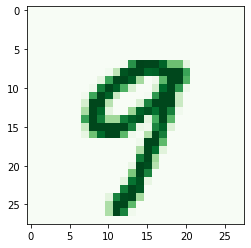

In [76]:
# demonstrating the image of the row 
plt.imshow(image_row.reshape(28,28), cmap="Greens") # reshaping it to a square 28*28 (= 784)

# Step 2: Using k-nearest neigbors algorithm on the dataset

In [81]:
from sklearn.neighbors import KNeighborsClassifier # importing k-nearest neighbors classifier

In [82]:
# saving the data about pixels to new variable
train_data = mnist_train.values[:, 1:] 
test_data = mnist_test.values[:, 1:]

In [83]:
# # saving the data about labels to new variable
train_label = mnist_train.values[:, 0]
test_label = mnist_test.values[:, 0]

In [84]:
# checking for correctness 
print(train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [85]:
print(train_label.shape, test_label.shape)

(60000,) (10000,)


In [86]:
# creating a classifier object
kn_classifier = KNeighborsClassifier(n_jobs=-1) # n_jobs=-1 - put to use all the CPU cores of the machine

In [87]:
# using the model on our data
kn_classifier = kn_classifier.fit(train_data, train_label)

The pictire depicts number 9


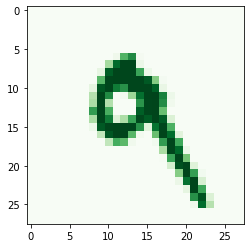

In [88]:
test_id = 7 # getting a random row to test the model

plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greens")
print("The pictire depicts number {}".format(test_label[test_id]))

In [89]:
# predicting the number
kn_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([9], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score # importing accuracy scoring

In [91]:
kn_predictions = kn_classifier.predict(test_data) # using prediction on the whole test date

In [102]:
# checking the accuracy of the model 
print("Accuracy: {}%".format(accuracy_score(test_label, kn_predictions) * 100)) 

Accuracy: 96.88%


# Step 3: Training multilayer perceptron neural network on the dataset

In [93]:
from sklearn.neural_network import MLPClassifier # importing multilayer perceptron classifier

In [94]:
# creating a classifier object
mlp_classifier = MLPClassifier(verbose=True)

In [95]:
# training the model on our data
mlp_classifier = mlp_classifier.fit(train_data, train_label)

Iteration 1, loss = 5.54012635
Iteration 2, loss = 0.73200300
Iteration 3, loss = 0.42438744
Iteration 4, loss = 0.31421874
Iteration 5, loss = 0.25699633
Iteration 6, loss = 0.20708247
Iteration 7, loss = 0.18279001
Iteration 8, loss = 0.15746450
Iteration 9, loss = 0.14239716
Iteration 10, loss = 0.13155557
Iteration 11, loss = 0.12343759
Iteration 12, loss = 0.12128753
Iteration 13, loss = 0.11624049
Iteration 14, loss = 0.11025658
Iteration 15, loss = 0.10523653
Iteration 16, loss = 0.10485545
Iteration 17, loss = 0.10257968
Iteration 18, loss = 0.09725598
Iteration 19, loss = 0.08918624
Iteration 20, loss = 0.08381074
Iteration 21, loss = 0.08392388
Iteration 22, loss = 0.08985854
Iteration 23, loss = 0.08740341
Iteration 24, loss = 0.07648222
Iteration 25, loss = 0.08948423
Iteration 26, loss = 0.07703606
Iteration 27, loss = 0.07557539
Iteration 28, loss = 0.07168122
Iteration 29, loss = 0.07352264
Iteration 30, loss = 0.05979788
Iteration 31, loss = 0.06558896
Iteration 32, los

The pictire depicts number 1


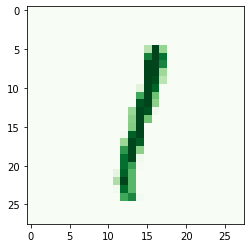

In [98]:
test_id = 57 # getting a random row to test the model

plt.imshow(test_data[test_id, :].reshape(28, 28), cmap="Greens")
print("The pictire depicts number {}".format(test_label[test_id]))

In [99]:
# predicting the number
mlp_classifier.predict(test_data[test_id, :].reshape(1, 784))

array([1], dtype=int64)

In [100]:
mlp_predictions = mlp_classifier.predict(test_data) # using prediction on the whole test date

In [104]:
# checking the accuracy of the model 
print("Accuracy: {}%".format(accuracy_score(test_label, mlp_predictions) * 100)) 

Accuracy: 96.03%
